<a href="https://colab.research.google.com/github/Jitha50/Bagging_Boosting_On-Bank_Dataset/blob/main/Bagging_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ensemble Learning: Bagging & Boosting

## Objective
Here we will deailing with a classifictaion problem.We have a model that can predict whether the client will subscribe to a term deposite or  not. The target varaible is a string column represented by (yes/no)

## Steps
<li> WE will be reading the data and performing basic EDA before fitting the model<br>
<li> Multiple classifier would be used on the same data and the relative perofrmance would be compared.<br>
<li> We will focussing on enssembe classifier in this exercise 
<li>Random forests<br>
<li> Bootstarp aggregation <br>
<li> Boosting Algorithm<br>


## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import zscore

In [ ]:
data = pd.read_csv('/content/bank-full.csv')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

From here we analyse that we have 45211 rows and 17 columns.

In [ ]:
# We will get the information of our data
# we need to chech the data type, null values and the number of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# We will heck out the presence of missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

We analyse from here that we don't have missing values in the dataset. However we could see few featurs like unknown and others for few columns. This ma be the missing values or outliers. This data will not be much helpful

In [ ]:
other = data.poutcome == 'other'
data_1 = data.drop(data[other].index, axis = 0, inplace = False)

# Step 2: filll the 'unknown' in job and education to'other'

data_1[['job','education']] = data_1[['job','education']].replace(['unknown'],'other')
data_1.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
# next part is to find summary of our data
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43371 non-null  int64 
 1   job        43371 non-null  object
 2   marital    43371 non-null  object
 3   education  43371 non-null  object
 4   default    43371 non-null  object
 5   balance    43371 non-null  int64 
 6   housing    43371 non-null  object
 7   loan       43371 non-null  object
 8   contact    43371 non-null  object
 9   day        43371 non-null  int64 
 10  month      43371 non-null  object
 11  duration   43371 non-null  int64 
 12  campaign   43371 non-null  int64 
 13  pdays      43371 non-null  int64 
 14  previous   43371 non-null  int64 
 15  poutcome   43371 non-null  object
 16  Target     43371 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB
None


In [ ]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43371.0,40.986443,10.595454,18.0,33.0,39.0,48.0,95.0
balance,43371.0,1356.963063,3030.956348,-8019.0,70.0,443.0,1417.0,102127.0
day,43371.0,15.862904,8.324122,1.0,8.0,16.0,21.0,31.0
duration,43371.0,258.266930,257.950498,0.0,103.0,180.0,318.0,4918.0
campaign,43371.0,2.776671,3.138053,1.0,1.0,2.0,3.0,63.0
pdays,43371.0,32.158954,90.689195,-1.0,-1.0,-1.0,-1.0,871.0
previous,43371.0,0.434853,1.559405,0.0,0.0,0.0,0.0,55.0


<Axes: xlabel='age', ylabel='balance'>

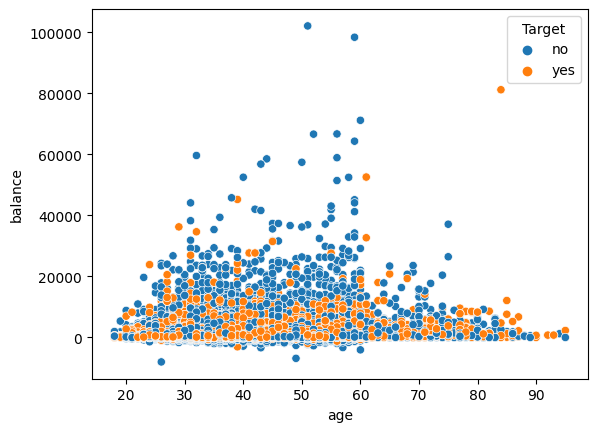

In [ ]:
# We will plot the data using scatter plot
sns.scatterplot(x = 'age', y= 'balance',hue = 'Target', data = data_1)

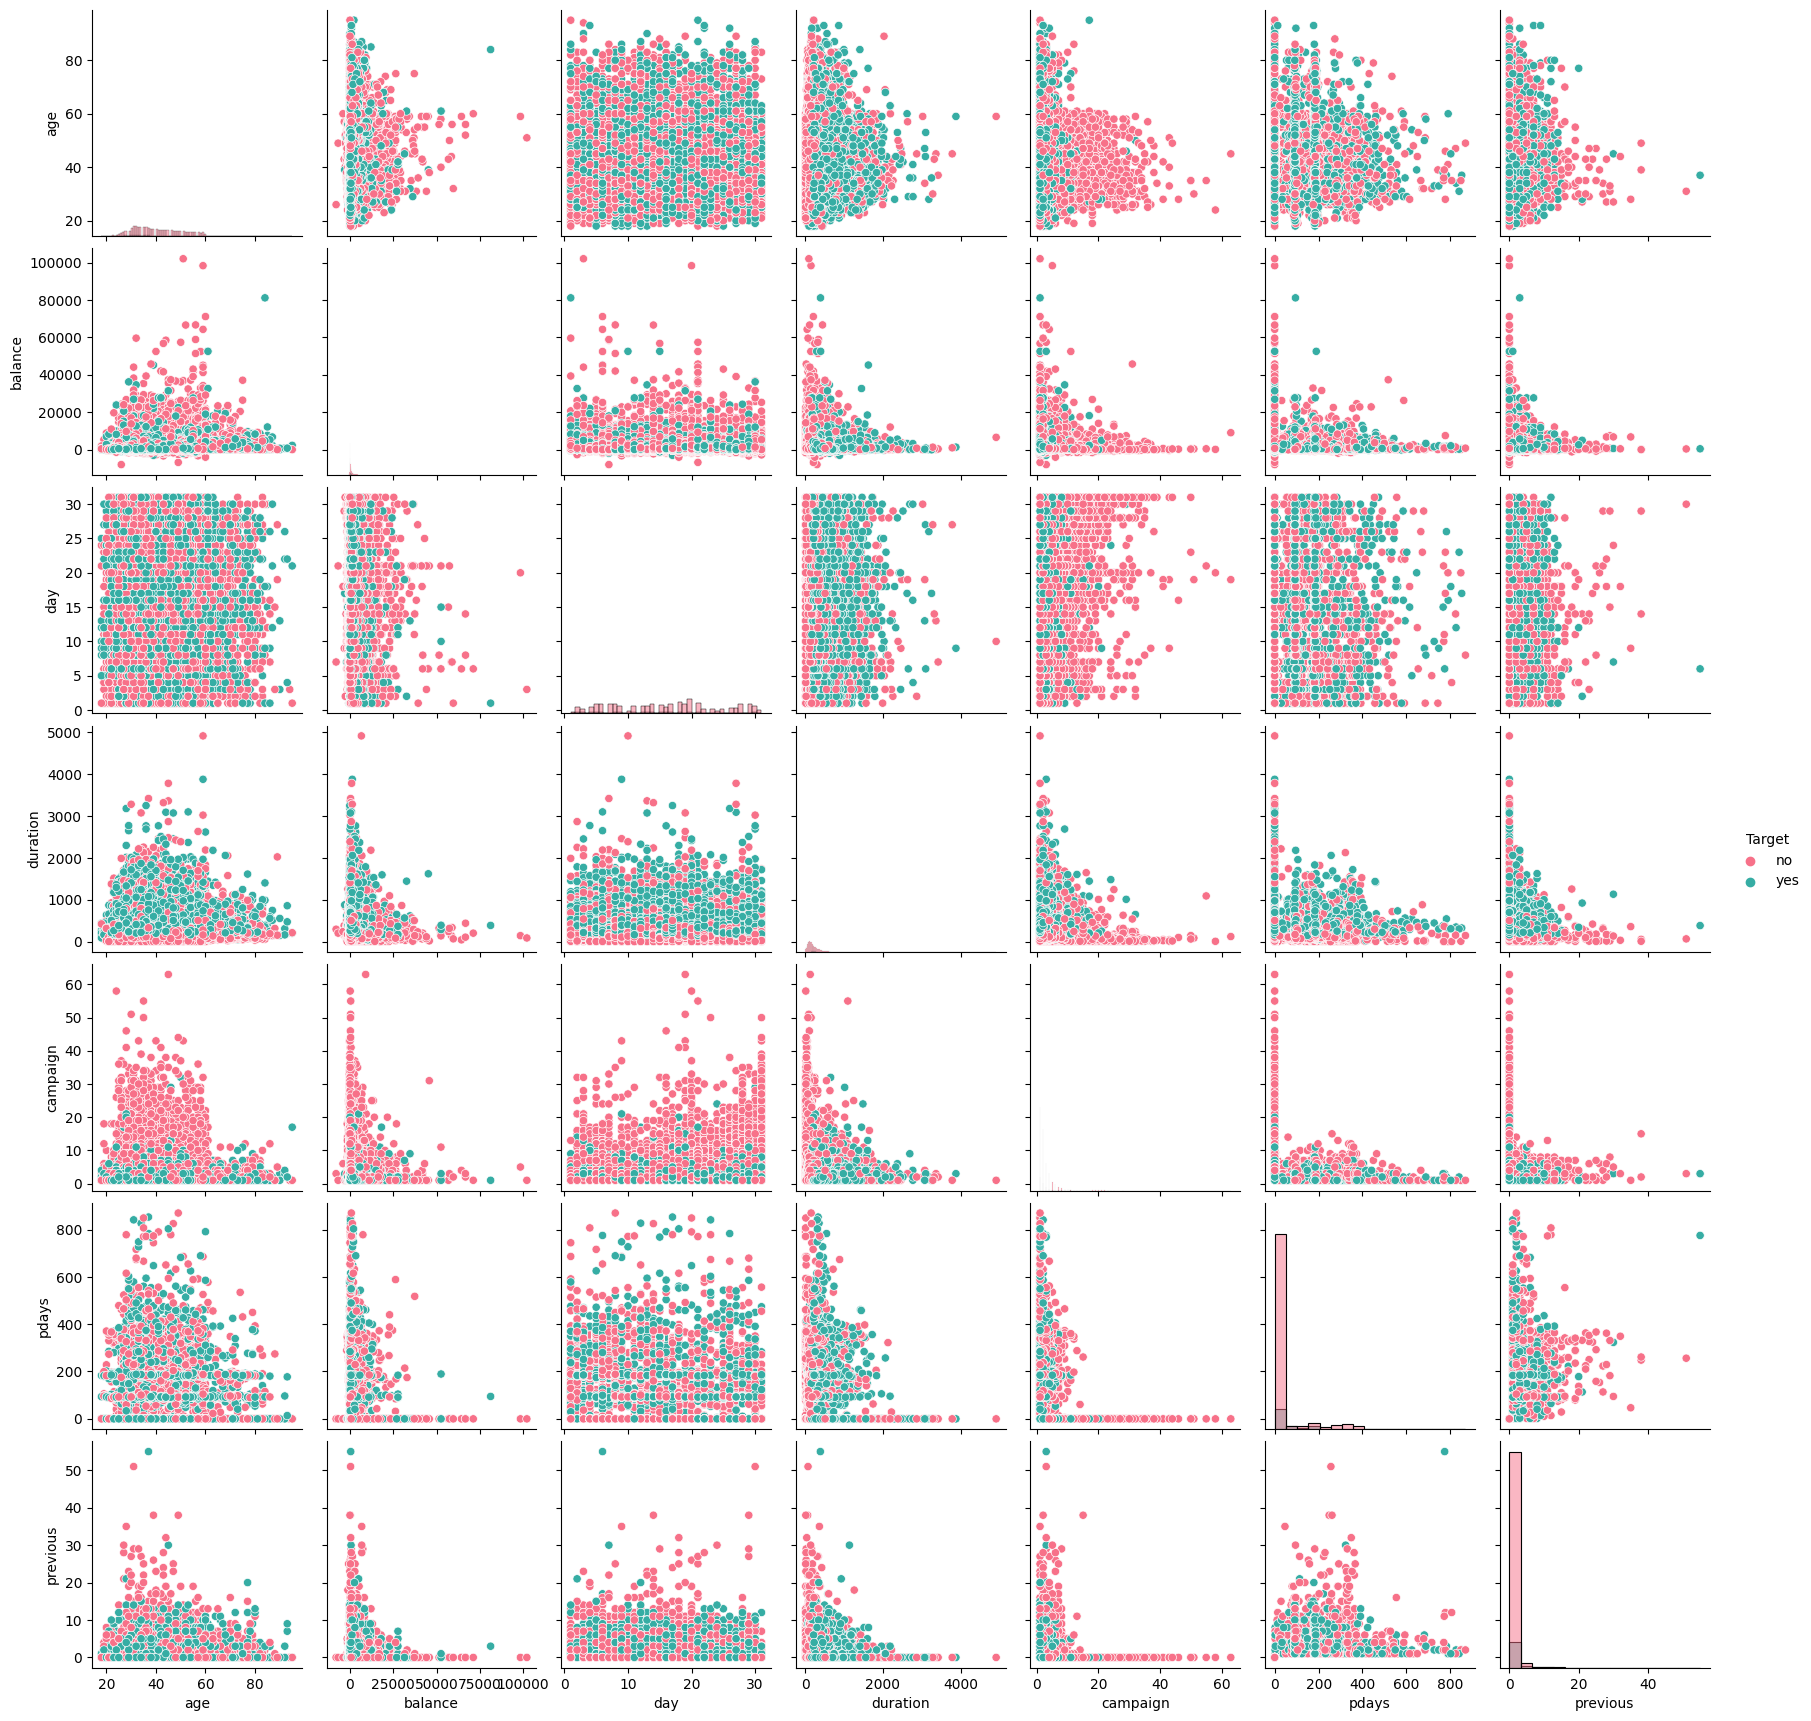

In [ ]:
sns.pairplot(data_1, hue = 'Target', diag_kind = 'hist', palette = 'husl')

In [ ]:
corr = data_1.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.094051,-0.011422,-0.006463,0.003840,-0.007011,0.013018
balance,0.094051,1.000000,0.001217,0.020134,-0.013255,0.004652,0.018805
day,-0.011422,0.001217,1.000000,-0.032632,0.168613,-0.088033,-0.054828
duration,-0.006463,0.020134,-0.032632,1.000000,-0.082664,0.000715,0.005559
campaign,0.003840,-0.013255,0.168613,-0.082664,1.000000,-0.093630,-0.051453
pdays,-0.007011,0.004652,-0.088033,0.000715,-0.093630,1.000000,0.569136
previous,0.013018,0.018805,-0.054828,0.005559,-0.051453,0.569136,1.000000


<Axes: >

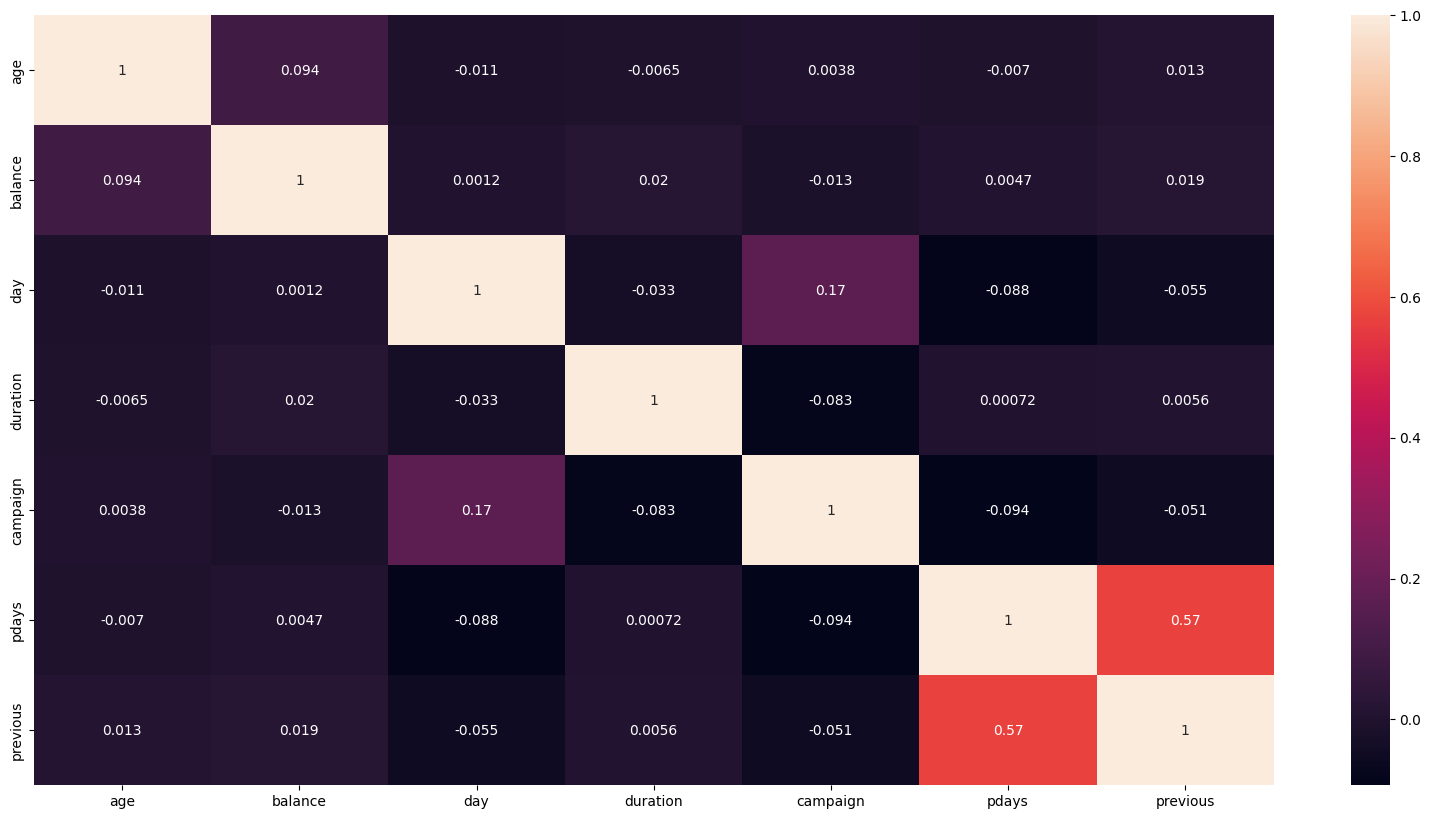

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot = True)

From the pairplots we can see that htere is no clear relationship between the varaibles age, balance duration and campaign. 
From the heat map of correltaion matix we can observe that 'camplaign outcome has  strong correlation with duration a moderate correlation with previous contacts and mild correlation between balance mo th of contact and number of campaign.

In [ ]:
data_1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
# Classification models, Decision tree in python can take only numerical/ categorical columns. It cannot take string / object types.
# The following code loops through each column and checks if the columns type is object and then convert those columns into
# categorical with each distinct values becoming a category or code.

for feature in data. columns :
  if data_1[feature].dtype == 'object': # only apply for columns with categorical strings
    data_1[feature] = pd.Categorical(data_1[feature]).codes # Replace string with an integer
data_1.info(), data_1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43371 non-null  int64
 1   job        43371 non-null  int8 
 2   marital    43371 non-null  int8 
 3   education  43371 non-null  int8 
 4   default    43371 non-null  int8 
 5   balance    43371 non-null  int64
 6   housing    43371 non-null  int8 
 7   loan       43371 non-null  int8 
 8   contact    43371 non-null  int8 
 9   day        43371 non-null  int64
 10  month      43371 non-null  int8 
 11  duration   43371 non-null  int64
 12  campaign   43371 non-null  int64
 13  pdays      43371 non-null  int64
 14  previous   43371 non-null  int64
 15  poutcome   43371 non-null  int8 
 16  Target     43371 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 3.1 MB


(None,
                 age           job       marital     education       default  \
 count  43371.000000  43371.000000  43371.000000  43371.000000  43371.000000   
 mean      40.986443      4.696825      1.165456      2.059164      0.018422   
 std       10.595454      3.661037      0.606564      0.779909      0.134475   
 min       18.000000      0.000000      0.000000      0.000000      0.000000   
 25%       33.000000      1.000000      1.000000      2.000000      0.000000   
 50%       39.000000      4.000000      1.000000      2.000000      0.000000   
 75%       48.000000      8.000000      2.000000      3.000000      0.000000   
 max       95.000000     11.000000      2.000000      3.000000      1.000000   
 
              balance       housing          loan       contact           day  \
 count   43371.000000  43371.000000  43371.000000  43371.000000  43371.000000   
 mean     1356.963063      0.551774      0.160914      0.662101     15.862904   
 std      3030.956348      0

In [ ]:
data_1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,3,0,2143,1,0,2,5,8,261,1,-1,0,2,0
1,44,10,2,2,0,29,1,0,2,5,8,151,1,-1,0,2,0
2,33,2,1,2,0,2,1,1,2,5,8,76,1,-1,0,2,0
3,47,1,1,0,0,1506,1,0,2,5,8,92,1,-1,0,2,0
4,33,5,2,0,0,1,0,0,2,5,8,198,1,-1,0,2,0
5,35,4,1,3,0,231,1,0,2,5,8,139,1,-1,0,2,0
6,28,4,2,3,0,447,1,1,2,5,8,217,1,-1,0,2,0
7,42,2,0,3,1,2,1,0,2,5,8,380,1,-1,0,2,0
8,58,6,1,1,0,121,1,0,2,5,8,50,1,-1,0,2,0
9,43,10,2,2,0,593,1,0,2,5,8,55,1,-1,0,2,0


In [ ]:
# Splitting of Data into Training and test Dataset


For splitting the data into training and test , we need to sepearte the dependent and independent (target) vraibales into two different data frame
Since cpmntact has no impact in the dataset we will drop the contact column contact in our dataset
Here our target varaibale is target. all other variables are dependetn variables/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
X = data_1.drop(['contact','Target'], axis = 1)
y = data_1['Target']

In [ ]:
X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [ ]:
# Apply the randomforesr model and print the accuracy of random forest model

from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(criterion = 'entropy', class_weight = {0:5, 1:5}, max_depth = 5, min_samples_leaf = 5)

In [ ]:
# we have to fit our model with the given dataset
model_1 = model_1.fit(X_train, y_train)
# We have to test our model
test_pred = model_1.predict(X_test)
model_score = model_1.score(X_test,y_test)
print(model_score*100,'%')


89.37134952351676 %


In [ ]:
#True positive (TP)- > It is the total counts having both predicted and actual values are Male
# True Negative (TN) -> It is the total counts having both predicted and actual values are not male
# False Positive(FP) -> It is the total counts having predcition is Dog while actually not
# Falase Negative (FN) -> It is total counts having prediction is not Dog while actually, it is dog


# From Confusion matrix , we can find the follwing metrics
# Accuracy : (TP + TN)/(TP+TN+FP+FN)
# Accuracy : -Accuracy is used to measure the performance of the model. It is the ratio of total correction instances to the toal instances.
# Precision -> Precision is a measure of how to accurate a model's positive predictions are. It is defined as the ratio of true positive 
# Predictions to total humber of positive predictions ade by the model.
# precision -> (TP)/(TP+FP)

# REcall -> Recall measures the differences ofa classification moidel in identifying all relevant instances from a daataset. It is
# the ratio of the number of true positive(TP) instance to the sum of true positive and false negative(FN) isntances.

# Recall = (TP)/(TP+FN)

# F1-Score : -F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall
# F1-score = (2*Precsion*Recall)/(Precision+Recall)

In [ ]:
#Confusuon matrix
print(metrics.confusion_matrix(y_test, test_pred))

[[11469    40]
 [ 1343   160]]


### We will apply Adaboost Ensemble Algorithm for the same data and print the accuracy

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 20)
abcl = abcl.fit(X_train,y_train)
test_pred = abcl.predict(X_test)
abcl_score = abcl.score(X_test,y_test)
print(abcl_score)

0.8934829388256994


In [ ]:
print(metrics.confusion_matrix(y_test,test_pred))

[[11182   327]
 [ 1059   444]]


### Apply Bagging Classifier Algorithm and print the accuracy socre and confusion matrix

In [54]:
from sklearn.ensemble import BaggingClassifier

bgcl  =BaggingClassifier(n_estimators = 10, max_samples = .7, bootstrap = True)
bgcl = bgcl.fit(X_train,y_train)
test_pred = bgcl.predict(X_test)
bgcl_score = bgcl.score(X_test, y_test)

print(bgcl_score)

# confusion matrix
print(metrics.confusion_matrix(y_test, test_pred))

0.8971718413771903
[[11144   365]
 [  973   530]]


### gradient Boost Classifier Algorith for the same data and print the accuracy

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred  = gbcl.predict(X_test)
gbcl_score = gbcl.score(X_test, y_test)
print(gbcl_score)
print(metrics.confusion_matrix(y_test, test_pred))

0.8992468490624039
[[11302   207]
 [ 1104   399]]


#### Comparision of models

In [57]:
print("Random Forest model", model_score)
print("The adaBoostClassififer model", abcl_score)
print("The Bagging Classifier model accuracy is", bgcl_score)
print("the Gradient Boost Classifier model accuracy", gbcl_score)

Random Forest model 0.8937134952351675
The adaBoostClassififer model 0.8934829388256994
The Bagging Classifier model accuracy is 0.8971718413771903
the Gradient Boost Classifier model accuracy 0.8992468490624039
